In [48]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ultralytics
from ultralytics import YOLO
from tensorflow.keras.models import load_model

In [49]:
detection_model = YOLO("./runs/detect/train/weights/best.pt")

In [50]:
classification_model = load_model("./modeli/model_1.keras")

In [51]:
folder_name = "output"
folder_path = os.path.join(os.getcwd(), folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [52]:
data_frame = pd.DataFrame(columns=range(6))

In [53]:
video_path = "./podaci_detekcija/traffic-sign-to-test.mp4"
output_video = "./output_video.mp4"

In [54]:
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.set(cv2.CAP_PROP_FPS, 30)
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [55]:
frame_index = 0
thickness = 2
color = (0, 255, 0)
box_size = 10

In [56]:
out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

In [57]:
while cap.isOpened():
    success, frame = cap.read()

    if success:
        results = detection_model(frame)
        detected_signs = results[0].boxes.data.cpu().numpy()
        arri = pd.DataFrame(results[0].boxes.data.cpu().numpy()).astype(float)
        for i in range(len(detected_signs)):
            arri=arri.assign(i=i)
            cv2.rectangle(frame, (int(detected_signs[i][0]),int(detected_signs[i][1])), (int(detected_signs[i][2]),int(detected_signs[i][3])), color, thickness)
            x1_roi, y1_roi, x2_roi, y2_roi = detected_signs[i][0] + thickness - box_size, detected_signs[i][1] + thickness - box_size, detected_signs[i][2] - thickness + box_size, detected_signs[i][3] - thickness + box_size
            roi = frame[int(y1_roi):int(y2_roi), int(x1_roi):int(x2_roi)]
            output_path = f"./output/frame_{frame_index}_{i}.png"
            cv2.imwrite(output_path, roi)
            frame_index += i
            arri=arri.assign(output_path=output_path)
            data_frame=pd.concat([data_frame,arri],axis=0)
            
        annotated_frame = results[0].plot()

        cv2.imshow("Detekcija saobracajnih znakova", annotated_frame)
        out.write(annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()


0: 288x480 2 prohibitors, 543.5ms
Speed: 2.0ms preprocess, 543.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)



C:\Users\DT User3\AppData\Local\Temp\ipykernel_8912\2775914946.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_frame=pd.concat([data_frame,arri],axis=0)


0: 288x480 2 prohibitors, 512.9ms
Speed: 2.0ms preprocess, 512.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 537.7ms
Speed: 2.0ms preprocess, 537.7ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 517.5ms
Speed: 2.0ms preprocess, 517.5ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 519.3ms
Speed: 2.0ms preprocess, 519.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 1 other, 527.1ms
Speed: 2.0ms preprocess, 527.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 532.1ms
Speed: 2.0ms preprocess, 532.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 507.2ms
Speed: 2.0ms preprocess, 507.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 2 prohibitors, 501.7ms
Speed: 1.0ms preprocess, 5

In [58]:
data_frame.columns=['x','y','x2','y2','confidence','class','i', 'output_path']

In [59]:
data_frame.shape

(234, 8)

In [60]:
data_frame.head(20)

,x,y,x2,y2,confidence,class,i,output_path
0,887.810547,321.001373,931.780090,360.207611,0.881072,0.0,0.0,./output/frame_0_0.png
1,889.796387,359.651611,931.677551,399.941162,0.859508,0.0,0.0,./output/frame_0_0.png
0,887.810547,321.001373,931.780090,360.207611,0.881072,0.0,1.0,./output/frame_0_1.png
1,889.796387,359.651611,931.677551,399.941162,0.859508,0.0,1.0,./output/frame_0_1.png
0,892.933899,358.603363,935.700500,400.738129,0.873373,0.0,0.0,./output/frame_1_0.png
1,891.535461,319.844391,936.584290,360.138672,0.840842,0.0,0.0,./output/frame_1_0.png
0,892.933899,358.603363,935.700500,400.738129,0.873373,0.0,1.0,./output/frame_1_1.png
1,891.535461,319.844391,936.584290,360.138672,0.840842,0.0,1.0,./output/frame_1_1.png
0,894.152283,357.107269,937.492249,401.632965,0.887082,0.0,0.0,./output/frame_2_0.png
1,893.523254,319.651489,937.996277,360.095184,0.841263,0.0,0.0,./output/frame_2_0.png


In [61]:
def load_images(path):
    images = list()
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(30,30))
            images.append(img)
    return images

In [62]:
images = load_images(folder_name)

In [63]:
def predict_class(img):
    data=[]
    data.append(np.array(img))
    X_test = np.array(data)
    predict_x=classification_model.predict(X_test) 
    Y_pred=np.argmax(predict_x,axis=1)
    confidence = np.max(predict_x)
    return Y_pred,confidence

In [64]:
# Stvarne klase za 2 znaka na videu:
# 3 - Speed limit (60km/h)
# 9 - No passing
real_classes = [3, 9]
correct_predictions = 0
wrong_predictions = 0
total_images = len(images)

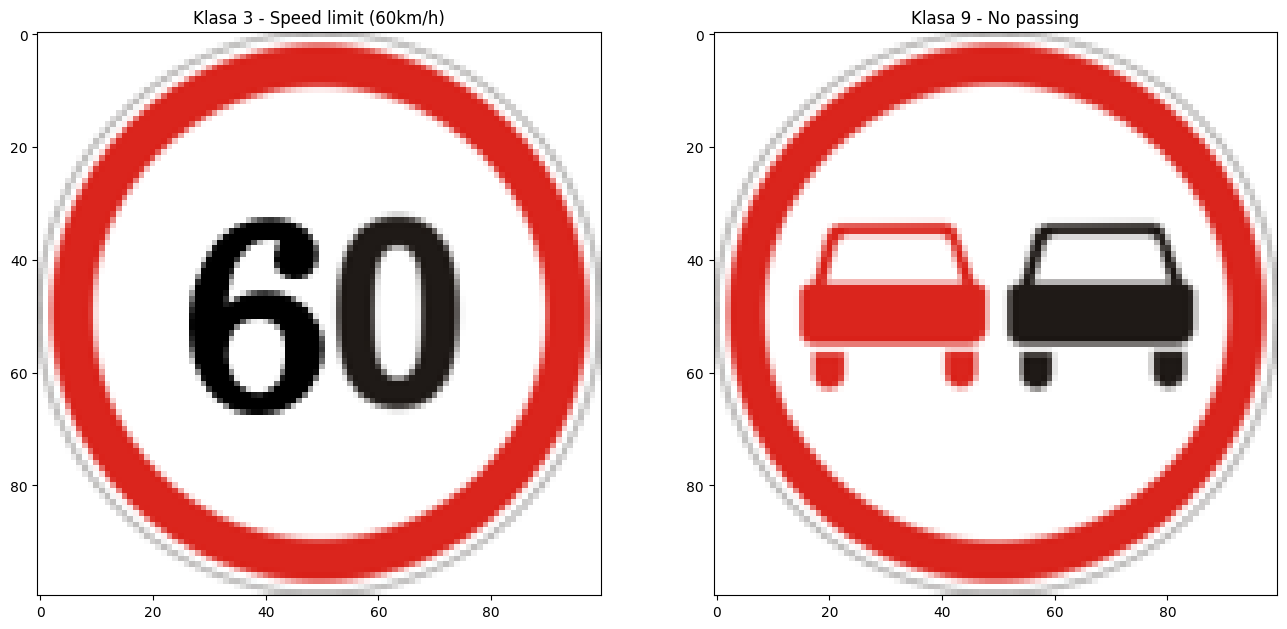

In [65]:
meta_path = "./podaci_klasifikacija/Meta"
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
img_path = meta_path + '/' + str(real_classes[0]) + '.png'
img = Image.open(img_path)
plt.imshow(img)
plt.title("Klasa 3 - Speed limit (60km/h)")
plt.subplot(1, 2, 2)
img_path2 = meta_path + '/' + str(real_classes[1]) + '.png'
img2 = Image.open(img_path2)
plt.imshow(img2)
plt.title("Klasa 9 - No passing")
plt.show()

In [66]:
for img in images:
  prediction, confidence = predict_class(img)
  if (prediction.item() in real_classes):
    correct_predictions += 1
  else:
    wrong_predictions += 1

1/1 [==============================] - 0s 22ms/step


In [67]:
print("REZULTATI KLASIFIKACIJE ZA DETEKTOVANE ZNAKOVE NA SVAKOM FRAME VIDEA")
print("---------------------------------------------------------------------")
print("Ukupno slika:",total_images)
print("Broj tacnih predikcija klasifikacije:",correct_predictions)
print("Broj netacnih predikcija klasifikacije:",wrong_predictions)
print(f"Procenat tacnosti predikcije klasifikacije: {(correct_predictions/total_images)*100} %")

REZULTATI KLASIFIKACIJE ZA DETEKTOVANE ZNAKOVE NA SVAKOM FRAME VIDEA
---------------------------------------------------------------------
Ukupno slika: 114
Broj tacnih predikcija klasifikacije: 85
Broj netacnih predikcija klasifikacije: 29
Procenat tacnosti predikcije klasifikacije: 74.56140350877193 %
